In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale

# Establish a connection with the file
fp = open("../data/German_Credit_Card_Fraud.csv")
# Read and store the data
data = np.array([[int(i.strip()) for i in line.split(',')] for line in fp.readlines()])

# Let's separate out the target variable and rest of the features for an unsupervised task
X, y = data[:,:-1], data[:,-1]

For n_clusters = 2 The average silhouette_score is : 0.5804941991369067
For n_clusters = 3 The average silhouette_score is : 0.45519057219534065
For n_clusters = 4 The average silhouette_score is : 0.3201769680879659
For n_clusters = 5 The average silhouette_score is : 0.33132504805435453
For n_clusters = 6 The average silhouette_score is : 0.3143439478462339
For n_clusters = 7 The average silhouette_score is : 0.2955665848490628
For n_clusters = 8 The average silhouette_score is : 0.2584829882904175
For n_clusters = 9 The average silhouette_score is : 0.2640946457984038
For n_clusters = 10 The average silhouette_score is : 0.26110993986459324


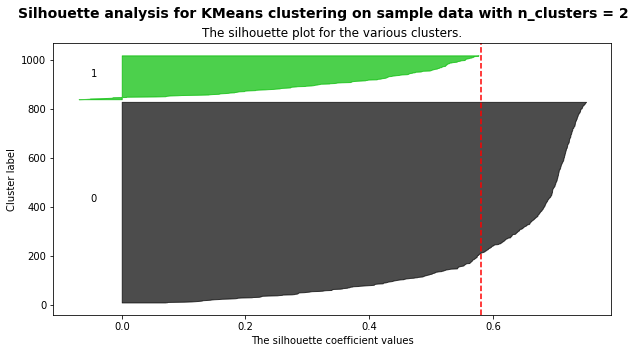

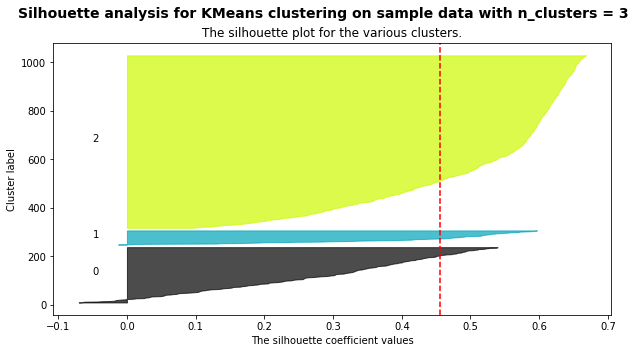

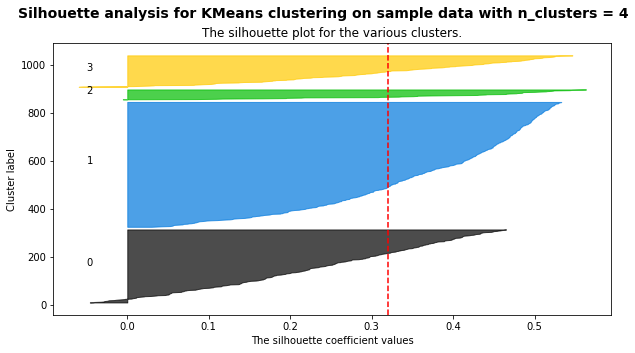

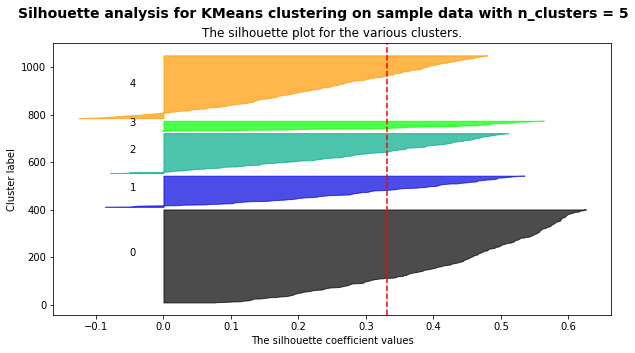

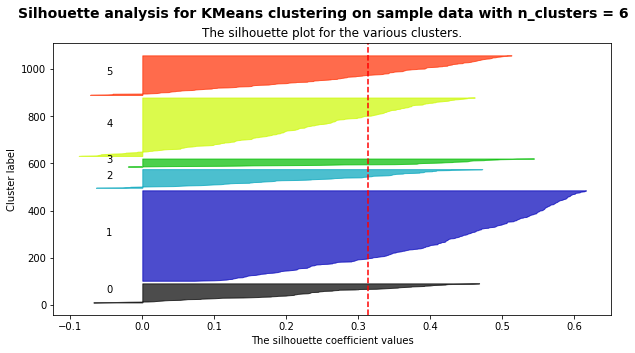

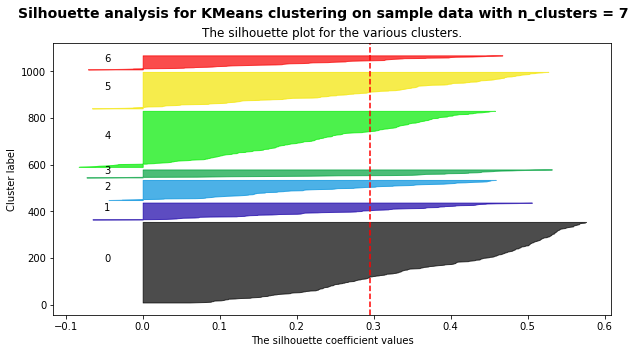

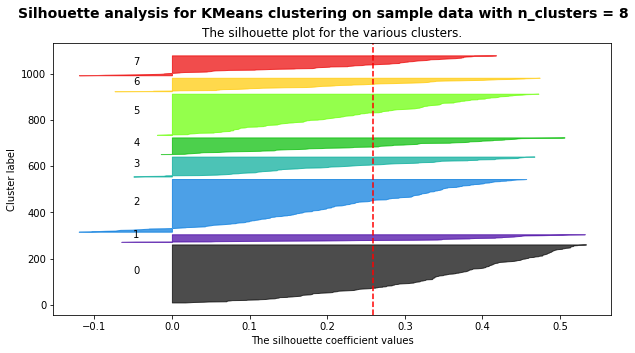

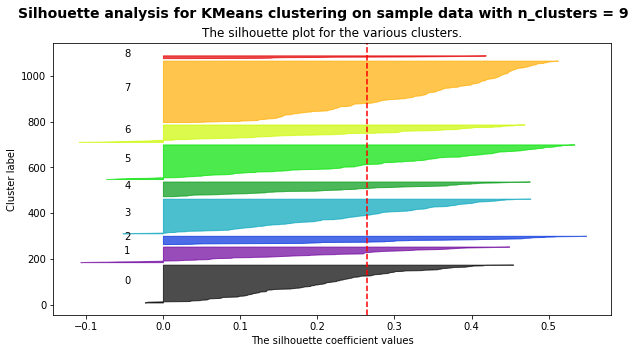

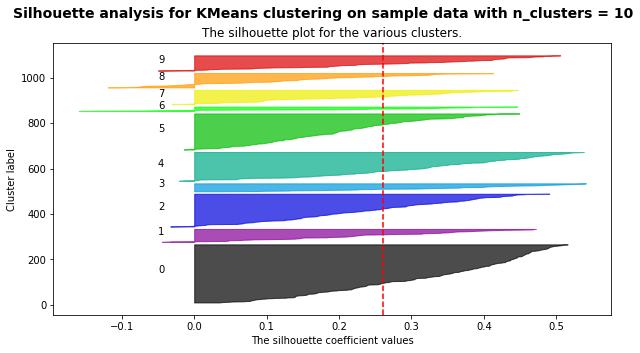

In [34]:
range_n_clusters = [i for i in range(2, 11)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(10, 5)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()